# Implementations

In [1]:
import pandas
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Generating synthetic dataset

In [2]:
def func(X): return X**2

X = np.arange(0, 100)
y = func(X) + np.random.randint(10, size=(100)) * np.random.normal(100)
data = zip(X, y)

In [3]:
syn_data = pandas.DataFrame(data, columns=['X', 'y'])
print(syn_data.head())

   X           y
0  0  198.702635
1  1  199.702635
2  2  500.756587
3  3  903.161856
4  4  413.405270


In [4]:
print(syn_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
X    100 non-null int64
y    100 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB
None


In [5]:
print(syn_data.describe())

                X             y
count  100.000000    100.000000
mean    49.500000   3727.600389
std     29.011492   3021.739733
min      0.000000     49.000000
25%     24.750000   1117.695734
50%     49.500000   2803.526976
75%     74.250000   5890.357904
max     99.000000  10496.459222


## Line Plot

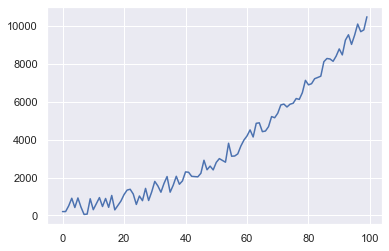

In [6]:
plt.plot(syn_data['X'].values, syn_data['y'].values)

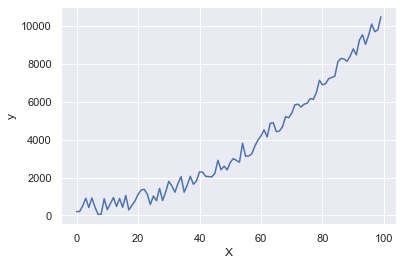

In [7]:
sns.lineplot(x='X', y='y', data=syn_data)

# Titanic dataset

In [8]:
titanic_data = sns.load_dataset('titanic')

In [9]:
print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [10]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


### _Why should I get rid of None values?_

In [11]:
titanic_data = titanic_data.dropna()

In [12]:
print(titanic_data.describe())

         survived      pclass         age       sibsp       parch        fare
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000
mean     0.675824    1.192308   35.623187    0.467033    0.478022   78.919735
std      0.469357    0.516411   15.671615    0.645007    0.755869   76.490774
min      0.000000    1.000000    0.920000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   24.000000    0.000000    0.000000   29.700000
50%      1.000000    1.000000   36.000000    0.000000    0.000000   57.000000
75%      1.000000    1.000000   47.750000    1.000000    1.000000   90.000000
max      1.000000    3.000000   80.000000    3.000000    4.000000  512.329200


### _Can I present this features with line plot?_ 

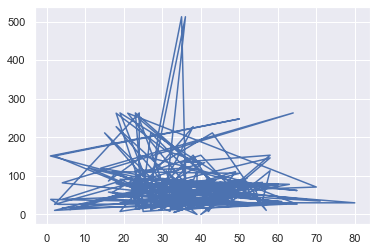

In [13]:
plt.plot(titanic_data['age'].values, titanic_data['fare'].values)

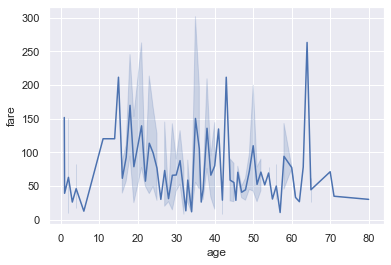

In [14]:
sns.lineplot(x='age', y='fare', data=titanic_data)

## Bar Plots / Catplots

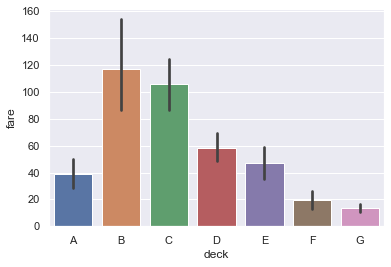

In [15]:
sns.barplot(x='deck', y='fare', data=titanic_data)

In [16]:
# plt.bar(titanic_data['deck'], titanic_data['fare'])

In [17]:
encoding = {'deck': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E':4, 'F':5, 'G':6}}
titanic_data.replace(encoding, inplace=True)

<BarContainer object of 182 artists>

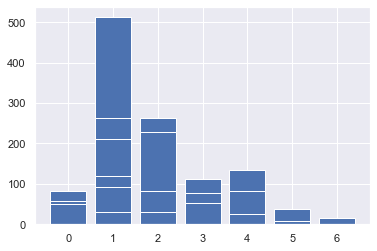

In [18]:
plt.bar(titanic_data['deck'].values, titanic_data['fare'].values)

# Iris Dataset

In [19]:
iris_data = pandas.read_csv('iris.csv')
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [20]:
print(iris_data.describe(include='all'))

        sepal_length  sepal_width  petal_length  petal_width     species
count     150.000000   150.000000    150.000000   150.000000         150
unique           NaN          NaN           NaN          NaN           3
top              NaN          NaN           NaN          NaN  versicolor
freq             NaN          NaN           NaN          NaN          50
mean        5.843333     3.057333      3.758000     1.199333         NaN
std         0.828066     0.435866      1.765298     0.762238         NaN
min         4.300000     2.000000      1.000000     0.100000         NaN
25%         5.100000     2.800000      1.600000     0.300000         NaN
50%         5.800000     3.000000      4.350000     1.300000         NaN
75%         6.400000     3.300000      5.100000     1.800000         NaN
max         7.900000     4.400000      6.900000     2.500000         NaN


## Box Plot

In [21]:
setosa = iris_data[iris_data['species'] == 'setosa']
versicolor = iris_data[iris_data['species'] == 'versicolor']
virginica = iris_data[iris_data['species'] == 'virginica']

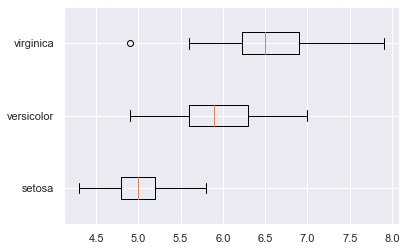

In [22]:
feature = 'sepal_length'

bp_data = [setosa[feature], versicolor[feature], virginica[feature]]
plt.boxplot(bp_data, vert=False, labels=['setosa', 'versicolor', 'virginica'])
plt.show()

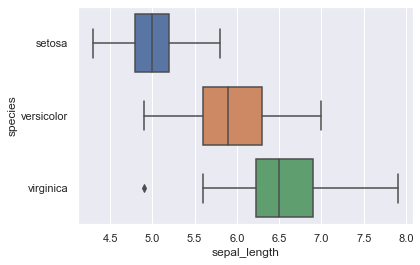

In [23]:
sns.boxplot(x='sepal_length', y='species', data=iris_data)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

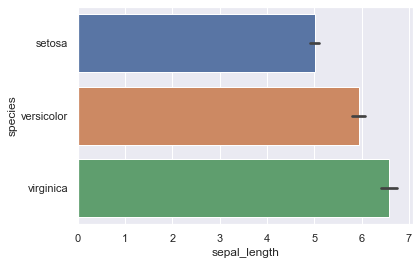

In [24]:
sns.barplot(x='sepal_length', y='species', data=iris_data)
plt.show

## Scatter Plot

### _Which algorithm should I choose? Cluster or Regression?_

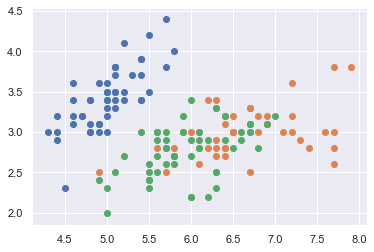

In [25]:
plt.scatter(setosa['sepal_length'].values, setosa['sepal_width'].values)
plt.scatter(virginica['sepal_length'].values, virginica['sepal_width'].values)
plt.scatter(versicolor['sepal_length'].values, versicolor['sepal_width'].values)
plt.show()

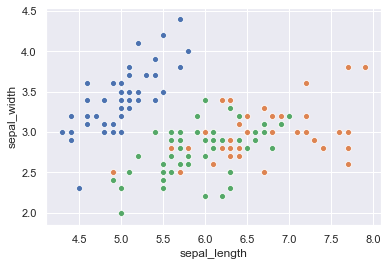

In [26]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=setosa)
sns.scatterplot(x='sepal_length', y='sepal_width', data=virginica)
sns.scatterplot(x='sepal_length', y='sepal_width', data=versicolor)
plt.show()

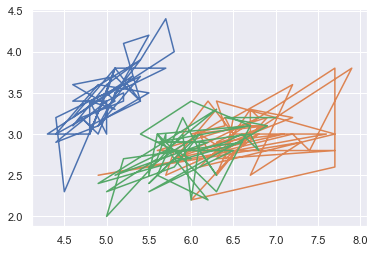

In [27]:
plt.plot(setosa['sepal_length'].values, setosa['sepal_width'].values)
plt.plot(virginica['sepal_length'].values, virginica['sepal_width'].values)
plt.plot(versicolor['sepal_length'].values, versicolor['sepal_width'].values)
plt.show()

In [28]:
encoding_map = {'species': {'setosa': 0, 'versicolor': 1, 'virginica':2}}
iris_data.replace(encoding_map, inplace=True)

# House Prices Dataset

In [29]:
house_data = pandas.read_csv('HousePrices.csv')
print(house_data.head())

   Area  Garage  FirePlace  Baths  White Marble  Black Marble  Indian Marble  \
0   164       2          0      2             0             1              0   
1    84       2          0      4             0             0              1   
2   190       2          4      4             1             0              0   
3    75       2          4      4             0             0              1   
4   148       1          4      2             1             0              0   

   Floors  City  Solar  Electric  Fiber  Glass Doors  Swiming Pool  Garden  \
0       0     3      1         1      1            1             0       0   
1       1     2      0         0      0            1             1       1   
2       0     2      0         0      1            0             0       0   
3       1     1      1         1      1            1             1       1   
4       1     2      1         0      0            1             1       1   

   Prices  
0   43800  
1   37550  
2   49500  
3 

In [30]:
print(house_data.describe(include='all'))

             Area     Garage   FirePlace       Baths  White Marble  \
count  200.000000  200.00000  200.000000  200.000000    200.000000   
mean   130.145000    1.98000    1.990000    3.095000      0.340000   
std     75.884493    0.83852    1.449276    1.324669      0.474898   
min      1.000000    1.00000    0.000000    1.000000      0.000000   
25%     65.750000    1.00000    1.000000    2.000000      0.000000   
50%    139.000000    2.00000    2.000000    3.000000      0.000000   
75%    200.250000    3.00000    3.000000    4.000000      1.000000   
max    249.000000    3.00000    4.000000    5.000000      1.000000   

       Black Marble  Indian Marble      Floors       City       Solar  \
count    200.000000     200.000000  200.000000  200.00000  200.000000   
mean       0.320000       0.340000    0.525000    2.00000    0.575000   
std        0.467647       0.474898    0.500628    0.83876    0.495584   
min        0.000000       0.000000    0.000000    1.00000    0.000000   
25% 

## Violin Plot

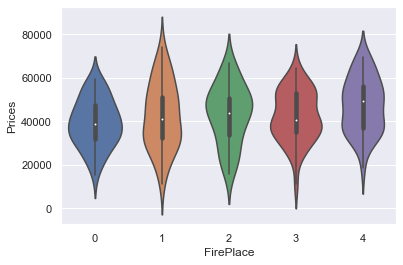

In [31]:
sns.violinplot(x='FirePlace', y='Prices', data=house_data)

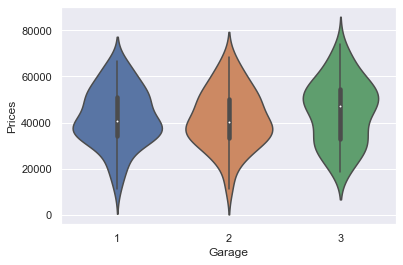

In [32]:
sns.violinplot(x='Garage', y='Prices', data=house_data)

## Correlation

In [33]:
features = ['Area', 'Garage', 'FirePlace', 'Garden', 'Prices']

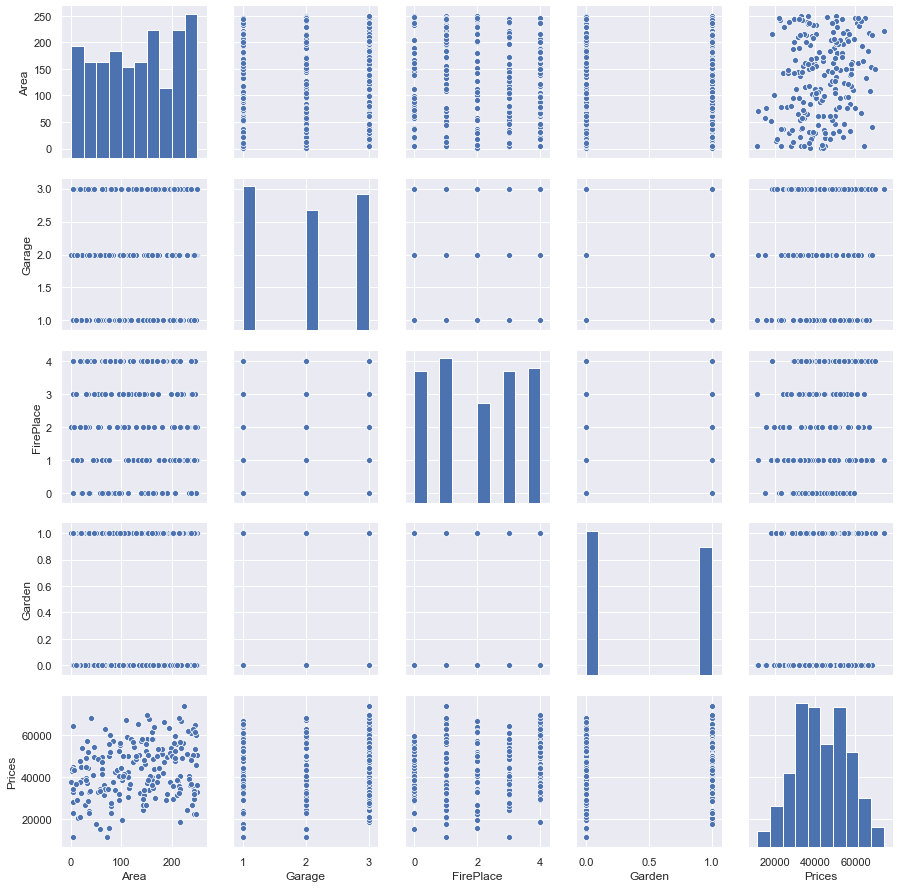

In [34]:
sns.pairplot(house_data[features])

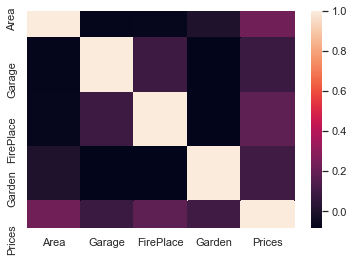

In [35]:
sns.heatmap(house_data[features].corr())

# Which dataset is better for which algorithm?

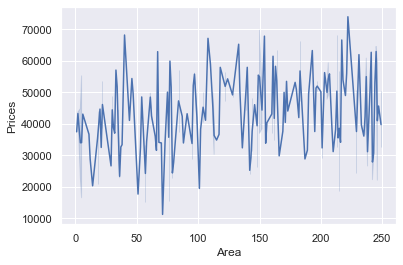

In [36]:
sns.lineplot(x='Area', y='Prices', data=house_data)

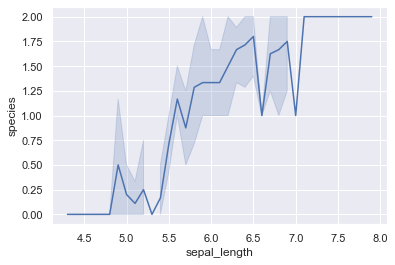

In [37]:
sns.lineplot(x='sepal_length', y='species', data=iris_data)

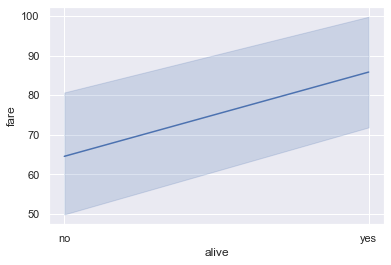

In [38]:
sns.lineplot(x='alive', y='fare', data=titanic_data)